In [1]:
# load module

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# load  dataset

In [4]:
train=pd.read_csv(r"train_loan_prediction.csv")
test=pd.read_csv(r"test_loan_prediction.csv")

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train['Credit_History']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [7]:
pd.Categorical(train['Credit_History']) #  1 means Credit history meets guidelines 0 

[1.0, 1.0, 1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0, 1.0, 0.0]
Length: 614
Categories (2, float64): [0.0, 1.0]

In [8]:
# Urban/ Semi and Rurual
pd.Categorical(train['Property_Area'])

['Urban', 'Rural', 'Urban', 'Urban', 'Urban', ..., 'Rural', 'Rural', 'Urban', 'Urban', 'Semiurban']
Length: 614
Categories (3, object): ['Rural', 'Semiurban', 'Urban']

In [9]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
train.shape

(614, 13)

In [11]:
test.shape

(367, 12)

In [12]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [13]:
# Missing Values: Check where there are missing values and
# fix them appropriately

In [14]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [15]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
# Fill missing values

In [17]:
train.isnull().count()

Loan_ID              614
Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     614
Credit_History       614
Property_Area        614
Loan_Status          614
dtype: int64

In [18]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Totoal','Percent'])
missing_data.head(30)

,Totoal,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [19]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [20]:
train['Gender'].fillna(train['Gender'].mode(),inplace=True)

In [21]:
train['Married'].fillna(train['Married'].mode(),inplace=True)
train['Dependents'].fillna(train['Dependents'].mode(),inplace=True)
train['Education'].fillna(train['Education'].mode(),inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode(),inplace=True)


In [22]:
total_missing=train.isnull().sum()
percentage=(train.isnull().sum()/train.isnull().count())
pd.concat([total_missing,percentage],keys=['Missing_value','Percentage'],axis=1)

,Missing_value,Percentage
Loan_ID,0,0.000000
Gender,13,0.021173
Married,3,0.004886
Dependents,15,0.024430
Education,0,0.000000
Self_Employed,32,0.052117
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,22,0.035831
Loan_Amount_Term,14,0.022801


In [23]:
train['Loan_Status'].fillna(train['Loan_Status'].mode(),inplace=True)
train['Property_Area'].fillna(train['Property_Area'].mode(),inplace=True)

In [24]:
total_missing=train.isnull().sum()
percentage=(train.isnull().sum()/train.isnull().count())
pd.concat([total_missing,percentage],keys=['Missing_value','Percentage'],axis=1)

,Missing_value,Percentage
Loan_ID,0,0.000000
Gender,13,0.021173
Married,3,0.004886
Dependents,15,0.024430
Education,0,0.000000
Self_Employed,32,0.052117
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,22,0.035831
Loan_Amount_Term,14,0.022801


In [25]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
train['Gender'].fillna(train['Gender'].mode(),inplace=True)
train['Dependents'].fillna(train['Dependents'].mode(),inplace=True)

In [27]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
train['Gender'] = train['Gender'].fillna(train['Gender'].dropna().mode().values[0] )


In [29]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
train.shape

(614, 13)

In [31]:
train['Married'] = train['Married'].fillna(train['Married'].dropna().mode().values[0] )


In [32]:
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].dropna().mode().values[0] )


In [33]:
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].dropna().mode().values[0] )


In [34]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())

In [36]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())

In [38]:
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].mean())

In [39]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
total_missing=train.isnull().sum()
percentage=(train.isnull().sum()/train.isnull().count())
pd.concat([total_missing,percentage],keys=['Missing_value','Percentage'],axis=1)

,Missing_value,Percentage
Loan_ID,0,0.0
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0


In [41]:
#Exploratory Data Analysis: We want to show the power of visualizations

In [42]:
train.groupby('Gender').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,,,,,
Female,4643.473214,1108.008929,127.225326,352.017857,0.832716
Male,5573.017928,1735.752829,150.692891,339.764940,0.844314


In [43]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [44]:
train.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP002524,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


In [45]:
succ=train[train['Loan_Status']=='Y']

In [46]:
pd.Categorical(succ['Gender'])

['Male', 'Male', 'Male', 'Male', 'Male', ..., 'Male', 'Female', 'Male', 'Male', 'Male']
Length: 422
Categories (2, object): ['Female', 'Male']

In [47]:
male_df=succ[succ['Gender']=='Male']
female_df=succ[succ['Gender']=='Female']


In [48]:
print("Male : ",len(male_df))
print("Female : ",len(female_df))

Male :  347
Female :  75


In [49]:
l1=len(male_df)
l2=len(female_df)
l3=len(succ)
print("Male Percentage : ",round(l1/l3*100,2))
print("Female Percentage : ",round(l2/l3*100,2))


Male Percentage :  82.23
Female Percentage :  17.77


(array([347.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  75.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

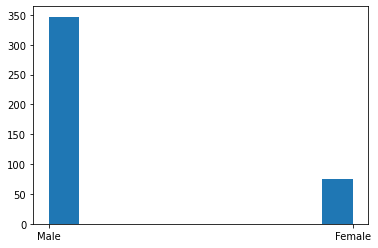

In [50]:
plt.hist(succ['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

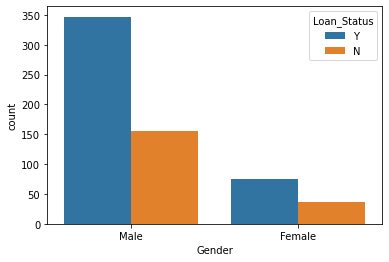

In [51]:
sns.countplot(x="Gender",hue="Loan_Status",data=train)

In [52]:
print("Loan Approved : ",len(train[train['Loan_Status']=='Y']))
print("Loan did not approve : ",len(train[train['Loan_Status']=='N']))


Loan Approved :  422
Loan did not approve :  192


<AxesSubplot:xlabel='Married', ylabel='count'>

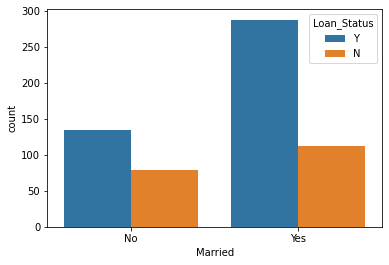

In [53]:
sns.countplot(x="Married",hue="Loan_Status",data=train)

In [54]:
#Married people collect more loan than unmarried

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

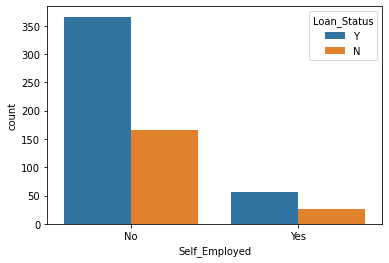

In [55]:
sns.countplot(x="Self_Employed",hue="Loan_Status",data=train)

In [56]:
# The category of those that take loans is less of self-employed people. That’s those are not self-employed probably 
# salalary earners obtain more loan.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

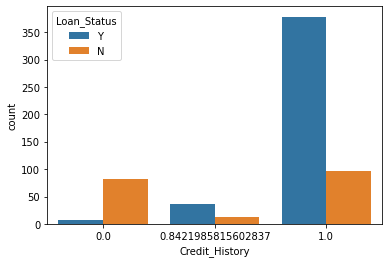

In [57]:
sns.countplot(x="Credit_History",hue="Loan_Status",data=train)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

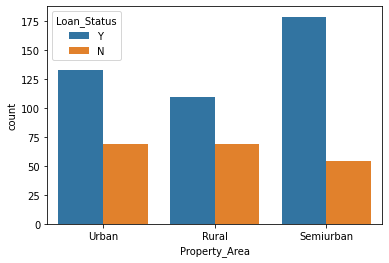

In [58]:
sns.countplot(x="Property_Area",hue="Loan_Status",data=train)

In [59]:
#Semiurban obtain more loan, folowed by Urban and then rural. This is logical!

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

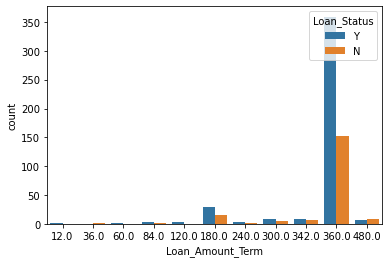

In [60]:
sns.countplot(x="Loan_Amount_Term",hue="Loan_Status",data=train)

In [61]:
#An extremely high number of them go for a 360 cyclic loan term. That’s pay back within a year

<Figure size 1152x648 with 0 Axes>

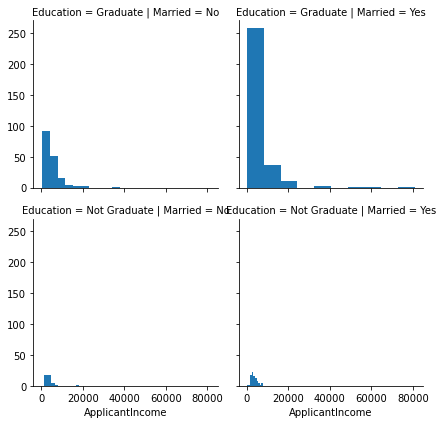

In [62]:
plt.figure(figsize=(16,9))
grid=sns.FacetGrid(train,row="Education",col="Married")
grid.map(plt.hist,"ApplicantIncome")
grid.add_legend()

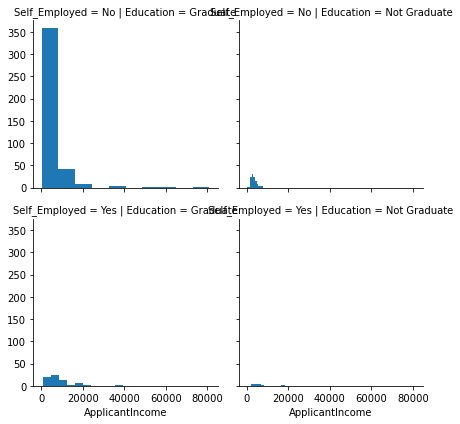

In [63]:
grid=sns.FacetGrid(train,row="Self_Employed",col="Education")
grid.map(plt.hist,'ApplicantIncome')
grid.add_legend()


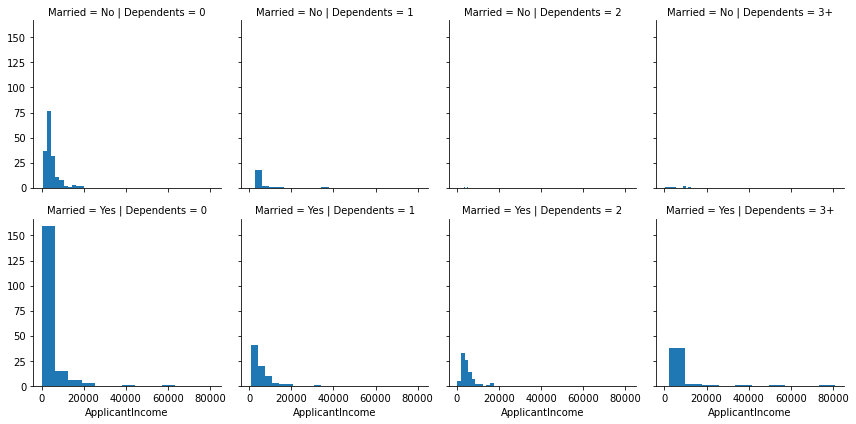

In [64]:
grid=sns.FacetGrid(train,row="Married",col="Dependents")
grid.map(plt.hist,'ApplicantIncome')


In [65]:
# Not married and no one is dependent on such has more income.
# Also, Married and no one dependent has greater income with a decreasing effect as the dependentsincreases

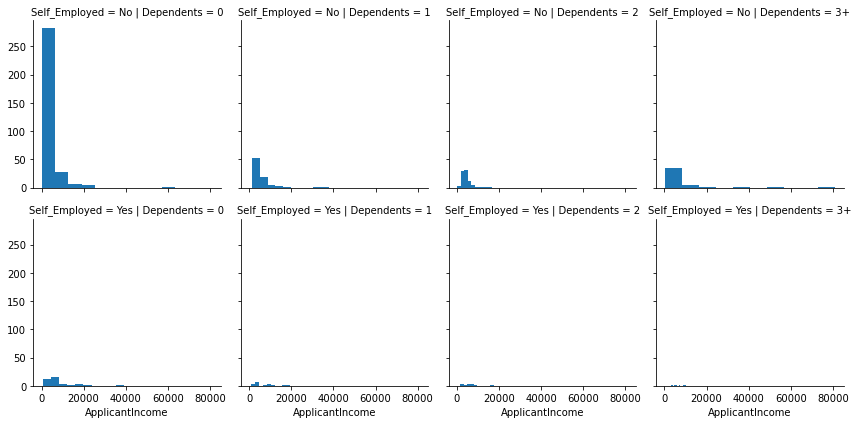

In [66]:
grid= sns.FacetGrid(train,row="Self_Employed",col="Dependents")
grid.map(plt.hist,'ApplicantIncome')


In [67]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [68]:
# split

In [69]:
y=train['Loan_Status']
X=train.drop('Loan_Status',axis=1)

In [70]:
# Label Incoding 


In [71]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
y=lr.fit_transform(y)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)


In [74]:
print("Size of X_train : ",X_train.shape)
print("Size of X_test : ",X_test.shape)
print("Size of y_train : ",y_train.shape)
print("Size of y_test : ",y_test.shape)


Size of X_train :  (491, 12)
Size of X_test :  (123, 12)
Size of y_train :  (491,)
Size of y_test :  (123,)


In [75]:
X_train.drop('Loan_ID',axis=1,inplace=True)

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [76]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
305,Male,No,0,Not Graduate,No,2000,0.0,146.412162,360.0,1.000000,Urban
469,Male,Yes,0,Graduate,No,4333,2451.0,110.000000,360.0,1.000000,Urban
218,Male,Yes,2,Graduate,No,5000,0.0,72.000000,360.0,0.000000,Semiurban
43,Male,Yes,0,Graduate,No,3941,2336.0,134.000000,360.0,1.000000,Semiurban
565,Male,Yes,0,Not Graduate,No,4467,0.0,120.000000,360.0,0.842199,Rural


In [77]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [78]:
train['Gender']=train['Gender'].map({'Male':0,'Female':1}).astype(int)

In [79]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [80]:
pd.Categorical(train['Gender'])

[0, 0, 0, 0, 0, ..., 1, 0, 0, 0, 1]
Length: 614
Categories (2, int64): [0, 1]

In [81]:
train['Married']=train['Married'].map({'No':0,'Yes':1}).astype(int)

In [82]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,1,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,1,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,0,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [83]:
train['Education']=train['Education'].map({'Graduate':1,'Not Graduate':0}).astype(int)

In [84]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [85]:
train['Self_Employed']=train['Self_Employed'].map({'Yes':1,'No':0}).astype(int)

In [86]:
train['CoapplicantIncome']=train['CoapplicantIncome'].fillna(train['CoapplicantIncome'].mean())

In [87]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [88]:
train.drop('CoapplicantIncome',axis=1,inplace=True)

In [89]:
#train['Property_Area']=train['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}).astype(int)

In [90]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,0,4583,128.000000,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,1,3000,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,0,2583,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,0,6000,141.000000,360.0,1.0,Urban,Y


In [91]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [92]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,0,4583,128.000000,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,1,3000,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,0,2583,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,0,6000,141.000000,360.0,1.0,Urban,Y


In [93]:
train['Loan_Status']=train['Loan_Status'].map({'Y':1,'N':0}).astype(int)

In [94]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,146.412162,360.0,1.0,Urban,1
1,LP001003,0,1,1,1,0,4583,128.000000,360.0,1.0,Rural,0
2,LP001005,0,1,0,1,1,3000,66.000000,360.0,1.0,Urban,1
3,LP001006,0,1,0,0,0,2583,120.000000,360.0,1.0,Urban,1
4,LP001008,0,0,0,1,0,6000,141.000000,360.0,1.0,Urban,1


In [95]:
train['Property_Area']=train['Property_Area'].map({'Rural':1,'Semirural':2,'Urban':3})

In [96]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,146.412162,360.0,1.0,3.0,1
1,LP001003,0,1,1,1,0,4583,128.000000,360.0,1.0,1.0,0
2,LP001005,0,1,0,1,1,3000,66.000000,360.0,1.0,3.0,1
3,LP001006,0,1,0,0,0,2583,120.000000,360.0,1.0,3.0,1
4,LP001008,0,0,0,1,0,6000,141.000000,360.0,1.0,3.0,1


In [97]:
train.drop('Loan_ID',axis=1,inplace=True)

In [98]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,146.412162,360.0,1.0,3.0,1
1,0,1,1,1,0,4583,128.000000,360.0,1.0,1.0,0
2,0,1,0,1,1,3000,66.000000,360.0,1.0,3.0,1
3,0,1,0,0,0,2583,120.000000,360.0,1.0,3.0,1
4,0,0,0,1,0,6000,141.000000,360.0,1.0,3.0,1


<AxesSubplot:>

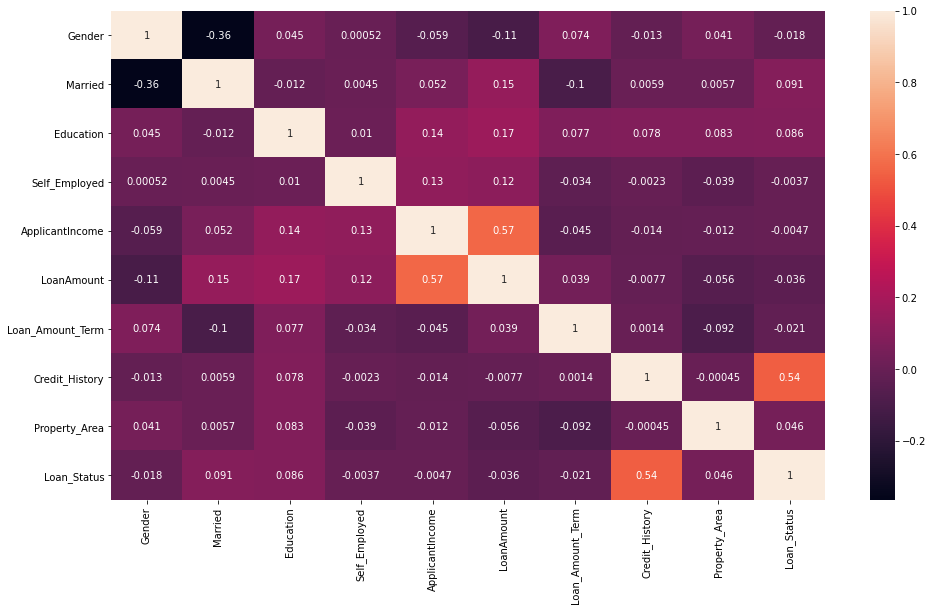

In [99]:
plt.figure(figsize=(16,9))
sns.heatmap(train.corr(),annot=True)

In [100]:
# separating target from the feature for training

In [101]:
y=train['Loan_Status']
X=train.drop('Loan_Status',axis=1)

In [102]:
X.shape

(614, 10)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)
print("Size of X_train : ",X_train.shape)
print("Size of X_test : ",X_test.shape)
print("Size of y_train : ",y_train.shape)
print("Size of y_test : ",y_test.shape)


Size of X_train :  (491, 10)
Size of X_test :  (123, 10)
Size of y_train :  (491,)
Size of y_test :  (123,)


In [105]:
# Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
lr=LabelEncoder()

In [109]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [110]:
test['Education']=lr.fit_transform(test['Education'])

In [111]:
test.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,0,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,0,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,0,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,0,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,1,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,1,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,1,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,1,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,0,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,1,No,2400,2400,123.0,360.0,1.0,Semiurban


In [112]:
#test['Self_Employed']=lr.fit_transform(test['Self_Employed'])

In [113]:
train.Gender.isnull().sum()

0

In [114]:
test['Gender']=lr.fit_transform(test['Gender'])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [ ]:
test.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
one=OneHotEncoder()

In [ ]:
test['Gender']=one.fit_transform(test['Gender'])